In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Specify the File Path
file_path = 'C:\\Users\\USER\\Downloads\\car+evaluation\\car.data'

# Load File 
data = pd.read_csv(file_path, header=None)

column_names = ['Buying', 'Maint', 'Doors', 'Persons', 'Lug_Boot', 'Safety','Class']

# 데이터프레임에 컬럼 이름 설정
data.columns = column_names

# A quick view
data.head()

,Buying,Maint,Doors,Persons,Lug_Boot,Safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Buying    1728 non-null   object
 1   Maint     1728 non-null   object
 2   Doors     1728 non-null   object
 3   Persons   1728 non-null   object
 4   Lug_Boot  1728 non-null   object
 5   Safety    1728 non-null   object
 6   Class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [4]:
data.isna().sum()

Buying      0
Maint       0
Doors       0
Persons     0
Lug_Boot    0
Safety      0
Class       0
dtype: int64

In [5]:
mapping = {}
reverse_mapping = {}

for column_name in column_names:
    unique_values = data[column_name].unique()
    mapping[column_name] = {}
    reverse_mapping[column_name] = {}

    for i, value in enumerate(unique_values):
        mapping[column_name][value] = i
        reverse_mapping[column_name][i] = value

In [6]:
for column_name in column_names:
    data[column_name] = data[column_name].map(mapping[column_name])

In [7]:
data

,Buying,Maint,Doors,Persons,Lug_Boot,Safety,Class
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,2,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...
1723,3,3,3,2,1,1,3
1724,3,3,3,2,1,2,2
1725,3,3,3,2,2,0,0
1726,3,3,3,2,2,1,3


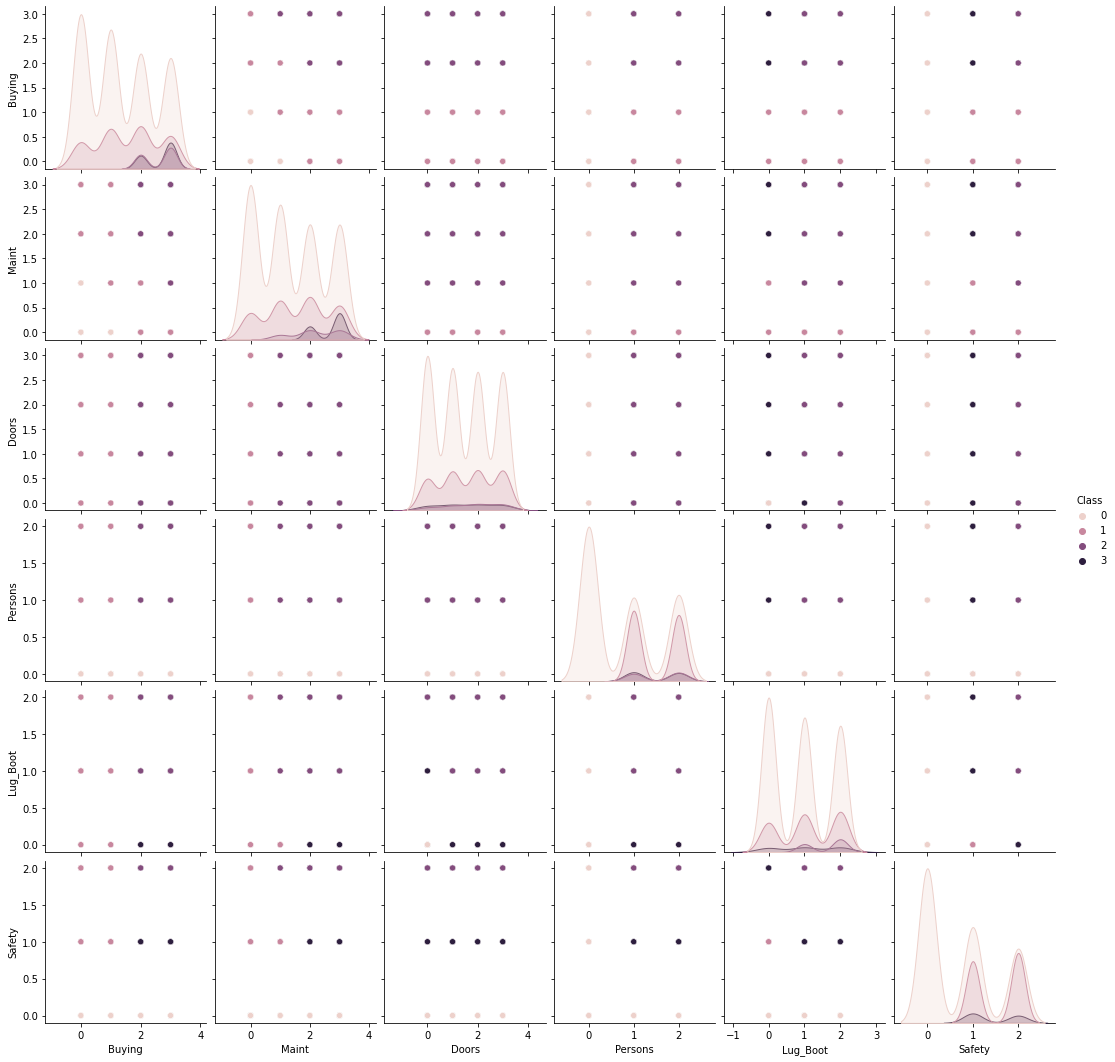

In [8]:
# pairplot

sns.pairplot(data,
             vars=['Buying', 'Maint', 'Doors', 'Persons', 'Lug_Boot', 'Safety'],
            hue ='Class')
plt.show()

<AxesSubplot:title={'center':'Analyze Correlation of Features'}>

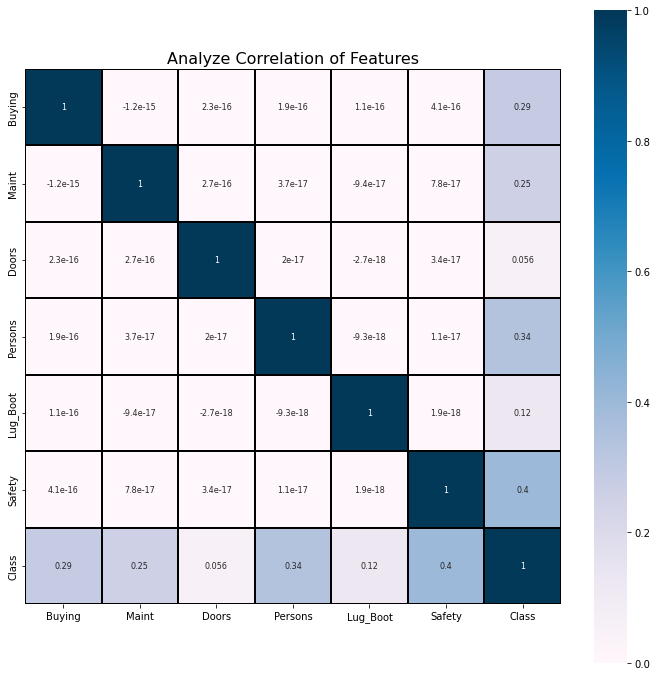

In [9]:
colormap = plt.cm.PuBu
plt.figure(figsize=(12, 12))
plt.title("Analyze Correlation of Features", y = 1.0, size = 16)
sns.heatmap(data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "black", annot = True, annot_kws = {"size" : 8})

In [10]:
x = data
x = x.drop(columns=['Class'], axis=1)

In [11]:
x

,Buying,Maint,Doors,Persons,Lug_Boot,Safety
0,0,0,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,2
3,0,0,0,0,1,0
4,0,0,0,0,1,1
...,...,...,...,...,...,...
1723,3,3,3,2,1,1
1724,3,3,3,2,1,2
1725,3,3,3,2,2,0
1726,3,3,3,2,2,1


In [12]:
y = data['Class']

In [13]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1723    3
1724    2
1725    0
1726    3
1727    2
Name: Class, Length: 1728, dtype: int64

In [14]:
# train & test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1296, 6), (432, 6), (1296,), (432,))

In [15]:
# SVM

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(x_train, y_train)

pred_svm = clf_svm.predict(x_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.9560185185185185
[[288   8   0   0]
 [  4  93   0   2]
 [  0   2  14   0]
 [  0   1   2  18]]


In [16]:
# LR

from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(x_train, y_train)

pred_lr = clf_lr.predict(x_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.8125
[[279  15   1   1]
 [ 43  53   1   2]
 [  0   5  11   0]
 [  2   9   2   8]]


In [17]:
# DT

from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(x_train, y_train)

pred_dt = clf_dt.predict(x_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.9722222222222222
[[295   1   0   0]
 [  6  89   0   4]
 [  0   1  15   0]
 [  0   0   0  21]]


In [18]:
# RF

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

print ("\n--- Random Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(x_train, y_train)
pred = rf_clf.predict(x_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Random Forest ---
0.9791666666666666
[[295   1   0   0]
 [  0  96   1   2]
 [  0   3  13   0]
 [  0   0   2  19]]
